<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chatper 6. 일반화 성능을 향상시키기 위한 방법**

In [ ]:
# 딥러닝 학습에서 신경망의 종류나 구성도 중요하지만, 가장 중요한 것은 학습 표본이다.
# 딥러닝이 일반 물체 인식(classification)에서 성공을 거둔 하나의 요인은 대량의 데이터가 있었기 때문이다.

# 학습 표본으로 사전에 준비된 대량의 데이터 집합이 있으면 그 데이터 집합으로 학습을 수행할 수 있다.
# 이에 비해, 제한적인 데이터만 확보된 데이터 집합이나 직접 데이터를 수집해서 충분한 데이터를 모으지 못한 경우에는
# 혹봐된 데이터를 최대한 효과적으로 사용할 수 있는 방법인 데이터 확장을 생각해 볼 수 있다.

**ImageNet**

In [ ]:
# 학습 표본을 대량으로 모아 놓은 데이터 집합.
# ImageNet은 그저 비슷한 이미지를 많이 모아 놓은 것이 아니라, 다양한 클래스와 클래스 내에서도 다양한 변이를 갖도록 구성.
# ImageNet: 계층적인 카테고리를 갖는 데이터 집합.

# synset: 카테고리 계층의 말단 노드에는 적게는 수백 장에서 많게는 수천 장에 이르는 이미지가 속해 있다.
# 서로 다른 클래스의 표본은 각도나 유형도 다양하다.

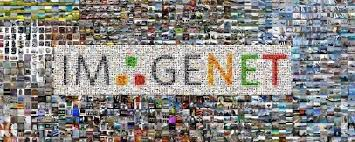

In [ ]:
# ImageNet의 장점: 그저 이미지를 수집해 놓은 것이 아니라. 애노테이션 정보가 포함되어 있다는 점이다.
# 케트고리 분류에 대한 애노테이션을 달아 놓으면, 각 이미지가 어떤 클래스에 속하는 지를 알 수 있다.
# 이에 더하여 물체의 위치 정보도 포함되어 있다. 이를 통해 일반 물체 인식뿐만 아니라, 물체 검출 데이터 집합으로써도 활용 가치가 있다.

**Places**

In [ ]:
# ImageNet과 마찬가지로 대량의 학습 표본을 모아 노은 데이터 집합.
# data augmentation(데이터 확장): 지금 확보한 표본을 기초로 하는 조금 변이된 데이터를 추가하여 이미지 수를 늘린다.

# 데이터 확장은 표본에 평행 이동이나 회전, 거울 반사 등을 적용하여 약간의 변화를 일으킨 새로운 표본을 만드는 방법.
# 여기에 쓴 변화 외에도 기하학적 혹은 이미지의 농담이나 색을 변경하는 경우도 있고, 랜덤 노이즈나 얼룩을 추가하는 경우도 있다.
# 이미지 전체에 평행이동이나 회전을 적용하는 경우에는 이미지에 따라 변경된 이미지가 경계 밖으로 빠져 나가는 경우도 있다.

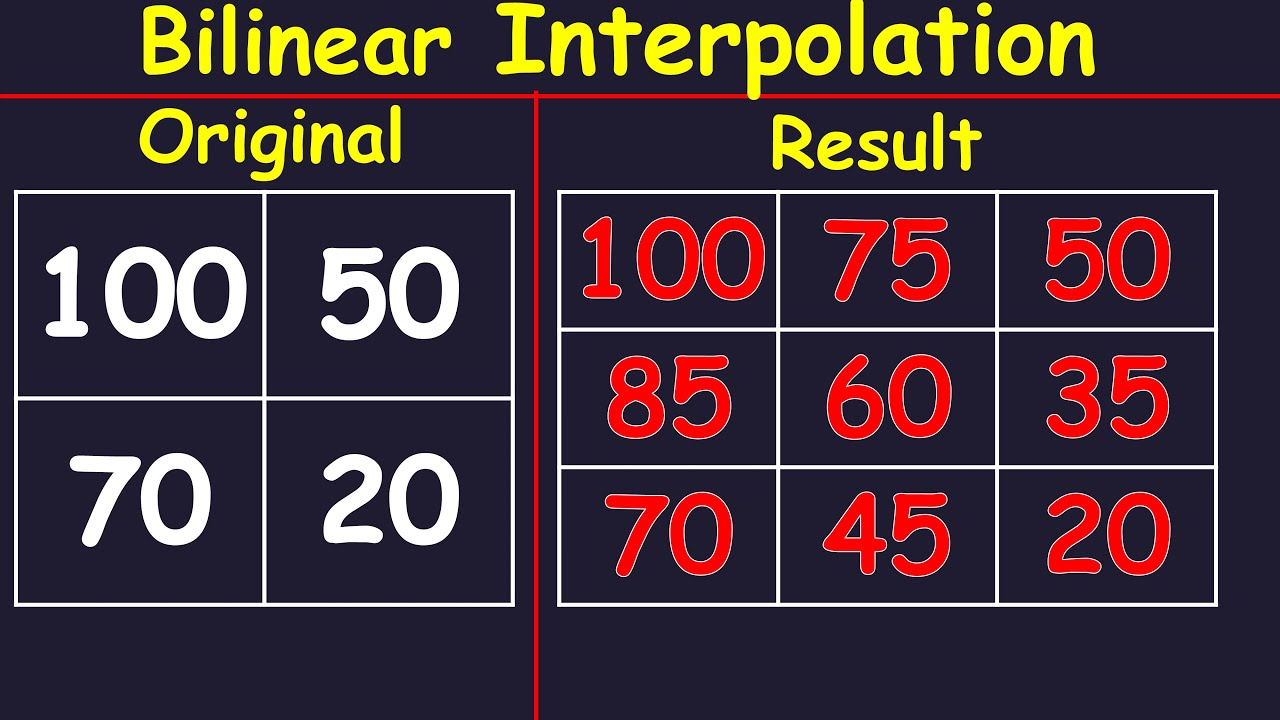

In [ ]:
# 필기 인식과 같은 형태에 변화가 있을 수 있는 문제를 대상으로 하는 경우, 형태에 변형을 가한 데이터를 만들어 데이터 확장을 할 수 있다.
# 형태를 변형시키는 방법으로는 탄성 변형을 들 수 있다.(elastic distortion)

**전처리**

In [ ]:
# 딥러닝은 입력 데이터에 특징 변화를 하지 않고, 입력 데이터 자체를 입력한다.
# 클래스 안에서 변동이 큰 경우에는 변동을 조금이라도 억제할 수 있도록 전처리 하는 경우가 많다.

# 전처리의 대표적인 예
# 1) 평균값 제거
# 2) 정규화
# 3) 백색화

**정규화 & 백색화**

In [ ]:
# 정규화: 각 표본의 평균과 분산을 일정하게 하는 전처리.
# 평균값 제거는 각 요소의 평균이 0이 되도록 하지만, 정규화는 각 요소의 값이 들쭉날쭉한 것을 막을 수 있도록 분산이 1이 되도록 한다.

# 백색화: 요소 사이의 상관(correlation)을 제거하는 방법.
# 이를 통해 상관이 적은 요소의 정보를 남겨, 이미지의 경우 모서리가 강조된 이미지를 얻을 수 있다.

**활성화 함수**

In [ ]:
# 신경망에서는 활성화 함수(activation function)로 시그모이드 함수가 주로 쓰였으나, 딥러닝에서 ReLU가 제안된 이래로
# ReLU의 파생 함수나 완전히 새로운 함수가 제안된 바있다.

# 1) 맥스아웃
# 합성곱층에 맥스 아웃을 사용하는 경우: 특징 맵 여러 개로로부터 같은 위치에서 최댓값을 선택하여 특징 맵을 통합하게 된다.
# 풀링: 같은 특징 맵의 국소 영역에서 최댓값을 선택하여 특징 맵을 통합하는 것이므로 특징 매의 축소 처리라 볼 수 있다.
# 이에 대해 맥스 아웃은 특징 맵 간의 최댓값을 선택하여 특징 맵을 통합하는 것이므로, 특징 맵의 수를 줄이는 것. (여러 필터의 응답값 중 최댓값을 출력.)

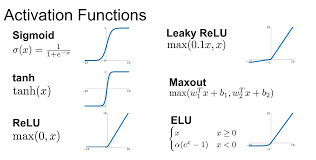

In [ ]:
# ReLU: 입력이 0보다 작으면 출력이 0이 되고, 입력이 0보다 크면 입력값을 그대로 출력하는 비선형 함수.

# 2) Leaky ReLU
# 3) Parametric ReLU
# 4) Randomized leaky Rectified Linear Units

**드롭아웃**

In [ ]:
# 신경망에서 문제가 되던 현상으로 과학습을 들 수 있다.
# 적은 양의 데이터만으로 학습을 진행하면 학습 데이터는 100%에 가깝게 정확히 식별해 낼 수 있는
# 학습 결과를 얻을 수 있다. 그런데 이를 다시 평가 데이터로 테스트하면 생각했던 대로 성능이 나오지 않는
# 괴락 발생하는 데, 이것이 과학습이다. 이 상태에서는 신경망이 갖는 잠재력을 충분히 발휘할 수 없다.

# 신경망의 학습: 미니 배치마다 역전파법으로 각각의 파라미터를 반복적으로 업데이트 한다.

In [ ]:
# 원래대로라면 모든 유닛의 출력으로 오차를 구하지만, 그중 일부가 누락되기 때문에 일종의
# 규제화와 같은 작용을 한다. 그리고 출력을 0으로 한 유닛에 대한 오차역전파 계산에는 원래의 값을 사용한다.
# 학습을 수행할 때에는 드롭아웃 비율만큼 유닛을 누락시킨 신경망이라 할 수 있지만, 인식을 수행할 때에는 모든
# 유닛을 사용한다. 이 때문에 출력하는 유닛의 수가 드롭아웃 비율의 역수를 곱한만큼 늘어나게 된다.

**드롭 커넥트**

In [ ]:
# 드롭아웃은 유닛의 출력을 0으로 하였지만, 드롭 커넥트는 일부 결합 가중치를 0으로 한다.

# 드롭 커넥트를 적용한 경우는 결합 가중치를 0으로 하기 때문에, 드롭아웅ㅅ보다 누락되는 조합이 훨씬 많다.
# 그 때문에 드롭아웃보다 과학습이 일어나기가 한층 어렵게 된다고 할 수 있다.

In [ ]:
# 드롭커넥트는 어떤 가중치를 0으로 할지를 무작위로 선택하지만, 이 무작위 선택이 어떻게 되느냐에 영향을
# 받으므로 항상 같은 성능을 달성하기 어렵다. 이는 드롭커넥트에서 해결해야 할 문제로, 현재 시점에서는
# 드롭커넥트보다 무작위 선택에 대한 의존성이 낮은 드롭아웃이 더 많이 쓰이고 있다.